In [14]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from data_tools_and_filters import *

lhc_dir = "data/total_dataset.pkl"
lhc_data = make_clean_df(lhc_dir)

#repurposing code to return PID columns without filters
def PID(df, type):
    type = type_check(type)
    df[type + '_PID'] = 1
    for part in prob_particles:
        col_name = type + net + part
        if part == 'e' or part == 'p':
            # Mistaken identification probability: electrons and protons are NOT what we are checking for
            df[type + '_PID'] *= 1 - df[col_name]
        elif part in type.lower():
            # Correct identification probability: decay particle is the type we are checking for
            df[type + '_PID'] *= df[col_name]
        else:
            # Mistaken identification probability: decay particle is NOT the type we are checking for
            df[type + '_PID'] *= 1 - df[col_name]

    return df

lhc_data = PID(lhc_data, 'mu_plus')
lhc_data = PID(lhc_data, 'mu_minus')
lhc_data = PID(lhc_data, 'K')
lhc_data = PID(lhc_data, 'Pi')
lhc_data['B0_ENDVERTEX_CHI2/NDOF'] = lhc_data['B0_ENDVERTEX_CHI2']/lhc_data['B0_ENDVERTEX_NDOF']
lhc_data['J_psi_ENDVERTEX_CHI2/NDOF'] = lhc_data['J_psi_ENDVERTEX_CHI2']/lhc_data['J_psi_ENDVERTEX_NDOF']
lhc_data['Kstar_ENDVERTEX_CHI2/NDOF'] = lhc_data['Kstar_ENDVERTEX_CHI2']/lhc_data['Kstar_ENDVERTEX_NDOF']

In [15]:
#study the correlation between these columns
columns = ["mu_plus_PID", "mu_minus_PID", "K_PID", "Pi_PID", "Pi_IPCHI2_OWNPV", "K_IPCHI2_OWNPV", 
           "mu_plus_IPCHI2_OWNPV", "mu_minus_IPCHI2_OWNPV", 'B0_ENDVERTEX_CHI2/NDOF', 'J_psi_ENDVERTEX_CHI2/NDOF',
          'Kstar_ENDVERTEX_CHI2/NDOF', 'mu_plus_PT', 'mu_minus_PT', 'B0_DIRA_OWNPV', 'B0_IPCHI2_OWNPV', 
          'B0_FDCHI2_OWNPV', 'K_PT', 'Pi_PT', 'B0_MM', 'Kstar_MM', 'J_psi_MM']

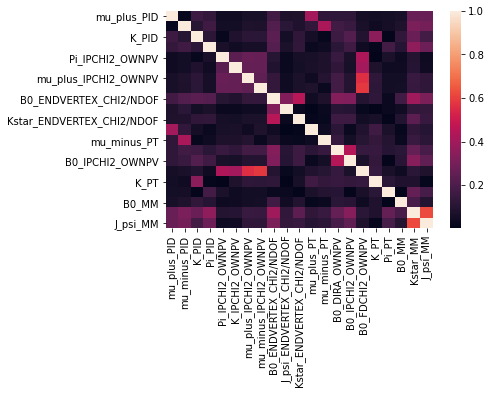

In [16]:
#lhc data  
corr_lhc = lhc_data[columns].corr().abs()
sn.heatmap(corr_lhc, annot=False)
plt.show()

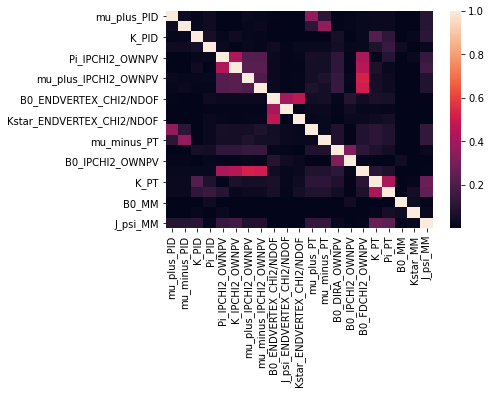

In [17]:
#simulated data
sim_dir = "data/acceptance_mc.pkl"
sim_data = make_clean_df(sim_dir)
sim_data = PID(sim_data, 'mu_plus')
sim_data = PID(sim_data, 'mu_minus')
sim_data = PID(sim_data, 'K')
sim_data = PID(sim_data, 'Pi')
sim_data['B0_ENDVERTEX_CHI2/NDOF'] = sim_data['B0_ENDVERTEX_CHI2']/sim_data['B0_ENDVERTEX_NDOF']
sim_data['J_psi_ENDVERTEX_CHI2/NDOF'] = sim_data['J_psi_ENDVERTEX_CHI2']/sim_data['J_psi_ENDVERTEX_NDOF']
sim_data['Kstar_ENDVERTEX_CHI2/NDOF'] = sim_data['Kstar_ENDVERTEX_CHI2']/sim_data['Kstar_ENDVERTEX_NDOF']
corr_sim = sim_data[columns].corr().abs()
sn.heatmap(corr_sim, annot=False)
plt.show()